# Impacto de la Salud Financiera en la Criminalidad y los Arrestos en NYC

## Importe de librerías y carga de datasets

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
quejas_df = pd.read_csv("NYPD_Complaint_Data_Historic_20250525.csv")
saludfinanciera_df = pd.read_csv("Neighborhood_Financial_Health_Digital_Mapping_and_Data_Tool_20250525.csv")
arrestos_df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20250525.csv")

/var/folders/lc/mw_sh4751wn_w5ppqd935h0r0000gn/T/ipykernel_36214/2189178600.py:1: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  quejas_df = pd.read_csv("NYPD_Complaint_Data_Historic_20250525.csv")


## Muestra de los primeros 10 registros de los datasets

### Dataset: NYPD Complaint Data Historic

In [7]:
quejas_df.head(10)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,39468181,02/20/2008,07:00:00,02/23/2008,08:00:00,88.0,02/23/2008,107,BURGLARY,221.0,...,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F
1,50539499,08/21/2008,22:00:00,08/21/2008,23:00:00,19.0,08/22/2008,109,GRAND LARCENY,438.0,...,(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F
2,45223390,04/03/2008,03:35:00,04/03/2008,03:50:00,77.0,04/03/2008,106,FELONY ASSAULT,109.0,...,(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F
3,50594658,08/19/2008,09:00:00,NaN,(null),32.0,08/27/2008,341,PETIT LARCENY,349.0,...,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M
4,44451016,03/10/2008,22:00:00,03/10/2008,22:10:00,67.0,03/11/2008,105,ROBBERY,397.0,...,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M
5,49918184,08/08/2008,01:30:00,08/08/2008,01:34:00,34.0,08/08/2008,355,OFFENSES AGAINST THE PERSON,115.0,...,(null),NaN,40.855233,-73.929406,"(40.855233, -73.929406)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,E
6,55066472,12/21/2008,06:07:00,NaN,(null),78.0,12/21/2008,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.669126,-73.973071,"(40.669126, -73.973071)",PATROL BORO BKLYN SOUTH,(null),25-44,WHITE,M
7,55244936,12/27/2008,02:04:00,NaN,(null),23.0,12/27/2008,347,INTOXICATED & IMPAIRED DRIVING,905.0,...,(null),NaN,40.791570,-73.944677,"(40.79156983, -73.94467676)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,E
8,47391386,06/19/2008,15:30:00,06/19/2008,16:30:00,61.0,06/20/2008,352,CRIMINAL TRESPASS,205.0,...,(null),NaN,40.605188,-73.952509,"(40.605188, -73.952509)",PATROL BORO BKLYN SOUTH,(null),18-24,WHITE HISPANIC,F
9,45814265,04/19/2008,19:45:00,04/19/2008,19:50:00,83.0,04/19/2008,578,HARRASSMENT 2,637.0,...,M,NaN,40.689954,-73.916924,"(40.689954, -73.916924)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE HISPANIC,F


### Dataset: Neighborhood Financial Health Digital Mapping and Data Tool

In [9]:
saludfinanciera_df.head(10)

,Year Published,PUMA,Borough,Neighborhoods,CD,Join,NYC_Poverty_Rate,Median_Income,Perc_White,Perc_Black,...,Ind6Rank,Ind6Definition,Ind7,Ind7Outcome,Ind7Rank,Ind7Definition,Ind8,Ind8Outcome,Ind8Rank,Ind8Definition
0,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,32.0,Percentage of jobs in small businesses (less t...,Participatory Budgeting,0.071777,26.0,Percentage of eligible residents casting a vot...,NaN,NaN,NaN,NaN
1,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,38.0,Percentage of bank & credit union branches off...,Mobile Banking Utilization,0.205800,23.0,Estimated percentage of residents that used mo...,NaN,NaN,NaN,NaN
2,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,27.0,Number of pre-foreclosure notices issued per 1...,Financial Counseling,0.000000,40.0,Full-Time Equivalent Financial Counselors per ...,NaN,NaN,NaN,NaN
3,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,41.0,Average (mean) travel time to work in minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,28.0,Percentage of people eligible for SNAP receivi...,Tax Credit Utilization,0.966000,9.0,Percentage of eligible Tax Units claiming EITC,Adults With High School Diploma,0.845032,21.0,Percentage of adults with a high school degree...
5,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",BX Community District 8,3701,0.152,30437,0.324,0.124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020,3702,Bronx,"Wakefield, Williamsbridge & Woodlawn",BX Community District 12,3702,0.232,26136,0.069,0.655,...,24.0,Percentage of jobs in small businesses (less t...,Participatory Budgeting,0.006118,41.0,Percentage of eligible residents casting a vot...,NaN,NaN,NaN,NaN
8,2020,3706,Bronx,"Bedford Park, Fordham North & Norwood",BX Community District 7,3706,0.264,18674,0.066,0.154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020,3702,Bronx,"Wakefield, Williamsbridge & Woodlawn",BX Community District 12,3702,0.232,26136,0.069,0.655,...,31.0,Percentage of bank & credit union branches off...,Mobile Banking Utilization,0.163800,44.0,Estimated percentage of residents that used mo...,NaN,NaN,NaN,NaN


### Dataset: NYPD Arrest Data

In [11]:
arrestos_df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299008265,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526)
5,299355928,01/13/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,M,WHITE HISPANIC,0,0,0.000000,0.000000,POINT (0 0)
6,299436365,01/14/2025,157,RAPE 1,104.0,RAPE,PL 130352B,F,Q,112,0,45-64,M,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758)
7,299562518,01/16/2025,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,M,26,0,<18,M,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853)
8,299690705,01/19/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,18-24,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
9,299815079,01/21/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,45-64,F,BLACK,1042942,154220,40.589791,-73.788678,POINT (-73.788678 40.589791)


## Selección de columnas relevantes de los datasets para el análisis

In [13]:
# Para analizar las denuncias, necesitamos la siguiente información: fecha y hora del delito, tipo de delito,
# lugar y barrio, e información del sospechoso y víctima
quejas_df = quejas_df[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'OFNS_DESC', 'LAW_CAT_CD', 'BORO_NM',
                        'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
                        'Latitude', 'Longitude']]

# Para realizar el análisis de la salud financiera de los vecindarios, necesitamos: ubicación, índices financieros, e
# indicadores clave e índices
saludfinanciera_df = saludfinanciera_df[['PUMA', 'Borough', 'Neighborhoods', 'NYC_Poverty_Rate', 'Median_Income',
                        'Perc_White', 'Perc_Black', 'Perc_Asian', 'Perc_Hispanic', 'IndexScore']]

# Para el análisis de los arrestos, se requiere esta información: fecha, tipo de delito, jurisdicción, barrio y 
# datos demográficos
arrestos_df = arrestos_df[['ARREST_KEY', 'ARREST_DATE', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 
                           'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']]

## Cambio de los nombres de las columnas para una mayor claridad al hacer el análisis

In [15]:
quejas_df = quejas_df.rename(columns = {
    'CMPLNT_NUM': 'Complaint_ID',
    'CMPLNT_FR_DT': 'Incident_Date',
    'OFNS_DESC': 'Offense_Description',
    'LAW_CAT_CD': 'Offense_Level',
    'BORO_NM': 'District',
    'SUSP_AGE_GROUP': 'Suspect_Age',
    'SUSP_RACE': 'Suspect_Race',
    'SUSP_SEX': 'Suspect_Sex',
    'VIC_AGE_GROUP': 'Victim_Age',
    'VIC_RACE': 'Victim_Race',
    'VIC_SEX': 'Victim_Sex',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'})

saludfinanciera_df = saludfinanciera_df.rename(columns = {
    'PUMA': 'PUMA',
    'Borough': 'District',
    'Neighborhoods': 'Neighborhood',
    'NYC_poverty_rate': 'Poverty_Rate',
    'Median_Income': 'Median_Income',
    'Perc_White': 'White_Population_Percent',
    'Perc_Black': 'Black_Population_Percent',
    'Perc_Asian': 'Asian_Population_Percent',
    'Perc_Hispanic': 'Hispanic_Population_Percent',
    'IndexScore': 'Financial_Health_Index'})

arrestos_df = arrestos_df.rename(columns = {
    'ARREST_KEY': 'Arrest_ID',
    'ARREST_DATE': 'Arrest_Date',
    'OFNS_DESC': 'Offense_Description',
    'LAW_CAT_CD': 'Offense_Level',
    'ARREST_BORO': 'District',
    'AGE_GROUP': 'Perpetrator_Age',
    'PERP_SEX': 'Perpetrator_Sex',
    'PERP_RACE': 'Perpetrator_Race',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'})

quejas_df.head(10)

,Complaint_ID,Incident_Date,Offense_Description,Offense_Level,District,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Latitude,Longitude
0,39468181,02/20/2008,BURGLARY,FELONY,BROOKLYN,(null),UNKNOWN,(null),25-44,WHITE,F,40.692464,-73.972708
1,50539499,08/21/2008,GRAND LARCENY,FELONY,MANHATTAN,(null),(null),(null),45-64,WHITE HISPANIC,F,40.771341,-73.953418
2,45223390,04/03/2008,FELONY ASSAULT,FELONY,BROOKLYN,(null),(null),(null),25-44,BLACK,F,40.671245,-73.926713
3,50594658,08/19/2008,PETIT LARCENY,MISDEMEANOR,MANHATTAN,(null),UNKNOWN,(null),(null),UNKNOWN,M,40.813412,-73.943226
4,44451016,03/10/2008,ROBBERY,FELONY,BROOKLYN,<18,BLACK,M,25-44,BLACK,M,40.650142,-73.944674
5,49918184,08/08/2008,OFFENSES AGAINST THE PERSON,MISDEMEANOR,MANHATTAN,(null),(null),(null),(null),UNKNOWN,E,40.855233,-73.929406
6,55066472,12/21/2008,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,25-44,BLACK,M,25-44,WHITE,M,40.669126,-73.973071
7,55244936,12/27/2008,INTOXICATED & IMPAIRED DRIVING,MISDEMEANOR,MANHATTAN,(null),(null),(null),(null),UNKNOWN,E,40.791570,-73.944677
8,47391386,06/19/2008,CRIMINAL TRESPASS,MISDEMEANOR,BROOKLYN,(null),(null),(null),18-24,WHITE HISPANIC,F,40.605188,-73.952509
9,45814265,04/19/2008,HARRASSMENT 2,VIOLATION,BROOKLYN,18-24,WHITE HISPANIC,M,25-44,WHITE HISPANIC,F,40.689954,-73.916924


In [16]:
saludfinanciera_df.head(10)

,PUMA,District,Neighborhood,NYC_Poverty_Rate,Median_Income,White_Population_Percent,Black_Population_Percent,Asian_Population_Percent,Hispanic_Population_Percent,Financial_Health_Index
0,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,5.184720
1,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,1.919036
2,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,7.491316
3,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,4.585011
4,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,3.970856
5,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,3.960090
6,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,NaN
7,3702,Bronx,"Wakefield, Williamsbridge & Woodlawn",0.232,26136,0.069,0.655,0.026,0.226,4.637373
8,3706,Bronx,"Bedford Park, Fordham North & Norwood",0.264,18674,0.066,0.154,0.061,0.696,0.985036
9,3702,Bronx,"Wakefield, Williamsbridge & Woodlawn",0.232,26136,0.069,0.655,0.026,0.226,1.706672


In [17]:
arrestos_df.head(10)

,Arrest_ID,Arrest_Date,Offense_Description,Offense_Level,District,Perpetrator_Age,Perpetrator_Sex,Perpetrator_Race,Latitude,Longitude
0,298874520,01/04/2025,GRAND LARCENY,F,M,25-44,M,BLACK,0.000000,0.000000
1,298799078,01/02/2025,ASSAULT 3 & RELATED OFFENSES,M,M,25-44,F,BLACK,40.794755,-73.942348
2,298921520,01/05/2025,MISCELLANEOUS PENAL LAW,F,K,45-64,M,WHITE,0.000000,0.000000
3,299008265,01/07/2025,FELONY ASSAULT,F,Q,45-64,M,BLACK,40.680086,-73.775931
4,298969999,01/06/2025,DANGEROUS WEAPONS,F,M,25-44,M,WHITE,40.715526,-74.001238
5,299355928,01/13/2025,ASSAULT 3 & RELATED OFFENSES,M,B,25-44,M,WHITE HISPANIC,0.000000,0.000000
6,299436365,01/14/2025,RAPE,F,Q,45-64,M,BLACK,40.722641,-73.851542
7,299562518,01/16/2025,ROBBERY,F,M,<18,M,BLACK,40.814853,-73.956314
8,299690705,01/19/2025,FELONY ASSAULT,F,Q,18-24,M,BLACK,40.680086,-73.775931
9,299815079,01/21/2025,FELONY ASSAULT,F,Q,45-64,F,BLACK,40.589791,-73.788678


## Limpieza de valores nulos

In [19]:
# Eliminación de registros con datos críticos faltantes, ya que son importantes para el análisis
quejas_df = quejas_df.replace('(null)', np.nan)
quejas_df = quejas_df.dropna(axis = 0)
# Las latitudes y longitudes pueden no ser nulos, y tener valores de 0.0
quejas_df = quejas_df[(quejas_df['Latitude'] != 0.0) & (quejas_df['Longitude'] != 0.0)]
# Selección de columnas donde puedan haber registros con valor 'UNKNOWN'
quejas_unknown = ['Suspect_Age', 'Suspect_Race', 'Suspect_Sex', 'Victim_Age', 'Victim_Race', 'Victim_Sex']
# Filtrado del dataset para eliminar los registros con valor 'UNKNOWN'
quejas_df = quejas_df.loc[~quejas_df[quejas_unknown].apply(lambda col: col.astype(str).str.upper() == 'UNKNOWN').any(axis=1)]

# Eliminación de registros con datos críticos faltantes, ya que son importantes para el análisis
saludfinanciera_df = saludfinanciera_df.dropna(axis = 0, how = 'all')
saludfinanciera_df = saludfinanciera_df.dropna(subset = ['Financial_Health_Index'])

# Eliminación de registros con datos críticos faltantes, ya que son importantes para el análisis
arrestos_df = arrestos_df.replace('(null)', np.nan)
arrestos_df = arrestos_df.dropna(axis = 0)
# Las latitudes y longitudes pueden no ser nulos, y tener valores de 0.0
arrestos_df = arrestos_df[(arrestos_df['Latitude'] != 0.0) & (arrestos_df['Longitude'] != 0.0)]
# Selección de columnas donde puedan haber registros con valor 'UNKNOWN'
arrestos_unknown = ['Perpetrator_Age', 'Perpetrator_Sex', 'Perpetrator_Race']
# Filtrado del dataset para eliminar los registros con valor 'UNKNOWN'
arrestos_df = arrestos_df.loc[~arrestos_df[arrestos_unknown].apply(lambda col: col.astype(str).str.upper() == 'UNKNOWN').any(axis=1)]

quejas_df.head(10)

,Complaint_ID,Incident_Date,Offense_Description,Offense_Level,District,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Latitude,Longitude
4,44451016,03/10/2008,ROBBERY,FELONY,BROOKLYN,<18,BLACK,M,25-44,BLACK,M,40.650142,-73.944674
6,55066472,12/21/2008,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,25-44,BLACK,M,25-44,WHITE,M,40.669126,-73.973071
9,45814265,04/19/2008,HARRASSMENT 2,VIOLATION,BROOKLYN,18-24,WHITE HISPANIC,M,25-44,WHITE HISPANIC,F,40.689954,-73.916924
20,48374887,07/14/2008,THEFT-FRAUD,FELONY,BROOKLYN,25-44,BLACK,F,45-64,WHITE,M,40.628285,-73.944245
26,54790190,11/11/2008,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BROOKLYN,25-44,BLACK HISPANIC,M,45-64,BLACK,F,40.655604,-73.926420
28,39182496,02/15/2008,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,MANHATTAN,18-24,BLACK,M,45-64,BLACK,M,40.810262,-73.941560
38,46834206,05/28/2008,PETIT LARCENY,MISDEMEANOR,BROOKLYN,45-64,WHITE HISPANIC,M,45-64,BLACK,F,40.680467,-73.971256
48,51499572,09/18/2008,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BRONX,18-24,BLACK HISPANIC,M,18-24,WHITE HISPANIC,F,40.812805,-73.927085
56,47430655,06/21/2008,FELONY ASSAULT,FELONY,MANHATTAN,18-24,WHITE HISPANIC,M,18-24,WHITE HISPANIC,F,40.867224,-73.926622
58,38839527,01/22/2008,SEX CRIMES,FELONY,BROOKLYN,<18,BLACK,M,<18,BLACK,F,40.630600,-73.973705


In [20]:
saludfinanciera_df.head(10)

,PUMA,District,Neighborhood,NYC_Poverty_Rate,Median_Income,White_Population_Percent,Black_Population_Percent,Asian_Population_Percent,Hispanic_Population_Percent,Financial_Health_Index
0,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,5.184720
1,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,1.919036
2,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,7.491316
3,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,4.585011
4,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,3.970856
5,3701,Bronx,"Riverdale, Fieldston & Kingsbridge",0.152,30437,0.324,0.124,0.052,0.477,3.960090
7,3702,Bronx,"Wakefield, Williamsbridge & Woodlawn",0.232,26136,0.069,0.655,0.026,0.226,4.637373
8,3706,Bronx,"Bedford Park, Fordham North & Norwood",0.264,18674,0.066,0.154,0.061,0.696,0.985036
9,3702,Bronx,"Wakefield, Williamsbridge & Woodlawn",0.232,26136,0.069,0.655,0.026,0.226,1.706672
10,3702,Bronx,"Wakefield, Williamsbridge & Woodlawn",0.232,26136,0.069,0.655,0.026,0.226,1.049708


In [21]:
arrestos_df.head(10)

,Arrest_ID,Arrest_Date,Offense_Description,Offense_Level,District,Perpetrator_Age,Perpetrator_Sex,Perpetrator_Race,Latitude,Longitude
1,298799078,01/02/2025,ASSAULT 3 & RELATED OFFENSES,M,M,25-44,F,BLACK,40.794755,-73.942348
3,299008265,01/07/2025,FELONY ASSAULT,F,Q,45-64,M,BLACK,40.680086,-73.775931
4,298969999,01/06/2025,DANGEROUS WEAPONS,F,M,25-44,M,WHITE,40.715526,-74.001238
6,299436365,01/14/2025,RAPE,F,Q,45-64,M,BLACK,40.722641,-73.851542
7,299562518,01/16/2025,ROBBERY,F,M,<18,M,BLACK,40.814853,-73.956314
8,299690705,01/19/2025,FELONY ASSAULT,F,Q,18-24,M,BLACK,40.680086,-73.775931
9,299815079,01/21/2025,FELONY ASSAULT,F,Q,45-64,F,BLACK,40.589791,-73.788678
10,300268692,01/30/2025,ROBBERY,F,K,25-44,M,BLACK,40.679670,-73.936136
11,300594896,02/05/2025,RAPE,F,K,18-24,M,BLACK,40.674496,-73.930571
12,300591760,02/05/2025,FELONY ASSAULT,F,Q,25-44,M,BLACK,40.707447,-73.792141


## Formateo de fechas

In [23]:
# Formateo de fechas a un formato válido
quejas_df['Incident_Date'] = pd.to_datetime(quejas_df['Incident_Date'], errors='coerce')
arrestos_df['Arrest_Date'] = pd.to_datetime(arrestos_df['Arrest_Date'], errors='coerce')

In [24]:
quejas_df.head(10)

,Complaint_ID,Incident_Date,Offense_Description,Offense_Level,District,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Latitude,Longitude
4,44451016,2008-03-10,ROBBERY,FELONY,BROOKLYN,<18,BLACK,M,25-44,BLACK,M,40.650142,-73.944674
6,55066472,2008-12-21,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,25-44,BLACK,M,25-44,WHITE,M,40.669126,-73.973071
9,45814265,2008-04-19,HARRASSMENT 2,VIOLATION,BROOKLYN,18-24,WHITE HISPANIC,M,25-44,WHITE HISPANIC,F,40.689954,-73.916924
20,48374887,2008-07-14,THEFT-FRAUD,FELONY,BROOKLYN,25-44,BLACK,F,45-64,WHITE,M,40.628285,-73.944245
26,54790190,2008-11-11,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BROOKLYN,25-44,BLACK HISPANIC,M,45-64,BLACK,F,40.655604,-73.926420
28,39182496,2008-02-15,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,MANHATTAN,18-24,BLACK,M,45-64,BLACK,M,40.810262,-73.941560
38,46834206,2008-05-28,PETIT LARCENY,MISDEMEANOR,BROOKLYN,45-64,WHITE HISPANIC,M,45-64,BLACK,F,40.680467,-73.971256
48,51499572,2008-09-18,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BRONX,18-24,BLACK HISPANIC,M,18-24,WHITE HISPANIC,F,40.812805,-73.927085
56,47430655,2008-06-21,FELONY ASSAULT,FELONY,MANHATTAN,18-24,WHITE HISPANIC,M,18-24,WHITE HISPANIC,F,40.867224,-73.926622
58,38839527,2008-01-22,SEX CRIMES,FELONY,BROOKLYN,<18,BLACK,M,<18,BLACK,F,40.630600,-73.973705


In [25]:
arrestos_df.head(10)

,Arrest_ID,Arrest_Date,Offense_Description,Offense_Level,District,Perpetrator_Age,Perpetrator_Sex,Perpetrator_Race,Latitude,Longitude
1,298799078,2025-01-02,ASSAULT 3 & RELATED OFFENSES,M,M,25-44,F,BLACK,40.794755,-73.942348
3,299008265,2025-01-07,FELONY ASSAULT,F,Q,45-64,M,BLACK,40.680086,-73.775931
4,298969999,2025-01-06,DANGEROUS WEAPONS,F,M,25-44,M,WHITE,40.715526,-74.001238
6,299436365,2025-01-14,RAPE,F,Q,45-64,M,BLACK,40.722641,-73.851542
7,299562518,2025-01-16,ROBBERY,F,M,<18,M,BLACK,40.814853,-73.956314
8,299690705,2025-01-19,FELONY ASSAULT,F,Q,18-24,M,BLACK,40.680086,-73.775931
9,299815079,2025-01-21,FELONY ASSAULT,F,Q,45-64,F,BLACK,40.589791,-73.788678
10,300268692,2025-01-30,ROBBERY,F,K,25-44,M,BLACK,40.679670,-73.936136
11,300594896,2025-02-05,RAPE,F,K,18-24,M,BLACK,40.674496,-73.930571
12,300591760,2025-02-05,FELONY ASSAULT,F,Q,25-44,M,BLACK,40.707447,-73.792141


## Cambio de registros a mayúscula para mayor consistencia

In [27]:
# Cambio de los nombres de los distritos y vecindarios del dataset 'Neighborhood Financial Health' a mayúsculas 
# para coincidir con los otros datasets
saludfinanciera_df['District'] = saludfinanciera_df['District'].astype(str).str.upper()
saludfinanciera_df['Neighborhood'] = saludfinanciera_df['Neighborhood'].astype(str).str.upper()

saludfinanciera_df.head(10)

,PUMA,District,Neighborhood,NYC_Poverty_Rate,Median_Income,White_Population_Percent,Black_Population_Percent,Asian_Population_Percent,Hispanic_Population_Percent,Financial_Health_Index
0,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.152,30437,0.324,0.124,0.052,0.477,5.184720
1,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.152,30437,0.324,0.124,0.052,0.477,1.919036
2,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.152,30437,0.324,0.124,0.052,0.477,7.491316
3,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.152,30437,0.324,0.124,0.052,0.477,4.585011
4,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.152,30437,0.324,0.124,0.052,0.477,3.970856
5,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.152,30437,0.324,0.124,0.052,0.477,3.960090
7,3702,BRONX,"WAKEFIELD, WILLIAMSBRIDGE & WOODLAWN",0.232,26136,0.069,0.655,0.026,0.226,4.637373
8,3706,BRONX,"BEDFORD PARK, FORDHAM NORTH & NORWOOD",0.264,18674,0.066,0.154,0.061,0.696,0.985036
9,3702,BRONX,"WAKEFIELD, WILLIAMSBRIDGE & WOODLAWN",0.232,26136,0.069,0.655,0.026,0.226,1.706672
10,3702,BRONX,"WAKEFIELD, WILLIAMSBRIDGE & WOODLAWN",0.232,26136,0.069,0.655,0.026,0.226,1.049708


## Normalización de datos

In [29]:
# Normalización de los registros del dataset 'Neighborhood Financial Health' para que tengan valores entre 0 y 1
scaler = MinMaxScaler()
cols_to_scale = ['Median_Income', 'NYC_Poverty_Rate', 'Financial_Health_Index']
saludfinanciera_df[cols_to_scale] = scaler.fit_transform(saludfinanciera_df[cols_to_scale])

saludfinanciera_df.head(10)

,PUMA,District,Neighborhood,NYC_Poverty_Rate,Median_Income,White_Population_Percent,Black_Population_Percent,Asian_Population_Percent,Hispanic_Population_Percent,Financial_Health_Index
0,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.291513,0.249723,0.324,0.124,0.052,0.477,0.518472
1,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.291513,0.249723,0.324,0.124,0.052,0.477,0.191904
2,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.291513,0.249723,0.324,0.124,0.052,0.477,0.749132
3,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.291513,0.249723,0.324,0.124,0.052,0.477,0.458501
4,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.291513,0.249723,0.324,0.124,0.052,0.477,0.397086
5,3701,BRONX,"RIVERDALE, FIELDSTON & KINGSBRIDGE",0.291513,0.249723,0.324,0.124,0.052,0.477,0.396009
7,3702,BRONX,"WAKEFIELD, WILLIAMSBRIDGE & WOODLAWN",0.586716,0.183521,0.069,0.655,0.026,0.226,0.463737
8,3706,BRONX,"BEDFORD PARK, FORDHAM NORTH & NORWOOD",0.704797,0.068665,0.066,0.154,0.061,0.696,0.098504
9,3702,BRONX,"WAKEFIELD, WILLIAMSBRIDGE & WOODLAWN",0.586716,0.183521,0.069,0.655,0.026,0.226,0.170667
10,3702,BRONX,"WAKEFIELD, WILLIAMSBRIDGE & WOODLAWN",0.586716,0.183521,0.069,0.655,0.026,0.226,0.104971


## Inserción de una columa nueva de edad promedio en base a los grupos de edades

In [31]:
# Rangos de edad a promedios numéricos
age_groups = {
    '<18': 16,
    '18-24': 21,
    '25-44': 34,
    '45-64': 54,
    '65+': 70}

# Inserción de columnas en base a los grupos de edad mapeados, convertidos a entero
quejas_df.insert((quejas_df.columns.get_loc('Suspect_Age')) + 1, 'Suspect_Age_Average', quejas_df['Suspect_Age'].map(age_groups).astype('Int64'))
quejas_df.insert((quejas_df.columns.get_loc('Victim_Age')) + 1, 'Victim_Age_Average', quejas_df['Victim_Age'].map(age_groups).astype('Int64'))
arrestos_df.insert((arrestos_df.columns.get_loc('Perpetrator_Age')) + 1, 'Perpetrator_Age_Average', arrestos_df['Perpetrator_Age'].map(age_groups).astype('Int64'))

quejas_df.head(10)

,Complaint_ID,Incident_Date,Offense_Description,Offense_Level,District,Suspect_Age,Suspect_Age_Average,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Age_Average,Victim_Race,Victim_Sex,Latitude,Longitude
4,44451016,2008-03-10,ROBBERY,FELONY,BROOKLYN,<18,16,BLACK,M,25-44,34,BLACK,M,40.650142,-73.944674
6,55066472,2008-12-21,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,25-44,34,BLACK,M,25-44,34,WHITE,M,40.669126,-73.973071
9,45814265,2008-04-19,HARRASSMENT 2,VIOLATION,BROOKLYN,18-24,21,WHITE HISPANIC,M,25-44,34,WHITE HISPANIC,F,40.689954,-73.916924
20,48374887,2008-07-14,THEFT-FRAUD,FELONY,BROOKLYN,25-44,34,BLACK,F,45-64,54,WHITE,M,40.628285,-73.944245
26,54790190,2008-11-11,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BROOKLYN,25-44,34,BLACK HISPANIC,M,45-64,54,BLACK,F,40.655604,-73.926420
28,39182496,2008-02-15,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,MANHATTAN,18-24,21,BLACK,M,45-64,54,BLACK,M,40.810262,-73.941560
38,46834206,2008-05-28,PETIT LARCENY,MISDEMEANOR,BROOKLYN,45-64,54,WHITE HISPANIC,M,45-64,54,BLACK,F,40.680467,-73.971256
48,51499572,2008-09-18,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BRONX,18-24,21,BLACK HISPANIC,M,18-24,21,WHITE HISPANIC,F,40.812805,-73.927085
56,47430655,2008-06-21,FELONY ASSAULT,FELONY,MANHATTAN,18-24,21,WHITE HISPANIC,M,18-24,21,WHITE HISPANIC,F,40.867224,-73.926622
58,38839527,2008-01-22,SEX CRIMES,FELONY,BROOKLYN,<18,16,BLACK,M,<18,16,BLACK,F,40.630600,-73.973705


In [32]:
arrestos_df.head(10)

,Arrest_ID,Arrest_Date,Offense_Description,Offense_Level,District,Perpetrator_Age,Perpetrator_Age_Average,Perpetrator_Sex,Perpetrator_Race,Latitude,Longitude
1,298799078,2025-01-02,ASSAULT 3 & RELATED OFFENSES,M,M,25-44,34,F,BLACK,40.794755,-73.942348
3,299008265,2025-01-07,FELONY ASSAULT,F,Q,45-64,54,M,BLACK,40.680086,-73.775931
4,298969999,2025-01-06,DANGEROUS WEAPONS,F,M,25-44,34,M,WHITE,40.715526,-74.001238
6,299436365,2025-01-14,RAPE,F,Q,45-64,54,M,BLACK,40.722641,-73.851542
7,299562518,2025-01-16,ROBBERY,F,M,<18,16,M,BLACK,40.814853,-73.956314
8,299690705,2025-01-19,FELONY ASSAULT,F,Q,18-24,21,M,BLACK,40.680086,-73.775931
9,299815079,2025-01-21,FELONY ASSAULT,F,Q,45-64,54,F,BLACK,40.589791,-73.788678
10,300268692,2025-01-30,ROBBERY,F,K,25-44,34,M,BLACK,40.679670,-73.936136
11,300594896,2025-02-05,RAPE,F,K,18-24,21,M,BLACK,40.674496,-73.930571
12,300591760,2025-02-05,FELONY ASSAULT,F,Q,25-44,34,M,BLACK,40.707447,-73.792141


## Cambio de la columa 'District' del dataset 'Arrest Data' para incluir el nombre completo del distrito

In [34]:
# Inicial y nombre completo del distrito
district_map = {
    'M': 'MANHATTAN',
    'Q': 'QUEENS',
    'B': 'BRONX',
    'K': 'BROOKLYN',
    'S': 'STATEN ISLAND'}

# Mapeo de la columna 'District'
arrestos_df['District'] = arrestos_df['District'].map(district_map)

arrestos_df.head(10)

,Arrest_ID,Arrest_Date,Offense_Description,Offense_Level,District,Perpetrator_Age,Perpetrator_Age_Average,Perpetrator_Sex,Perpetrator_Race,Latitude,Longitude
1,298799078,2025-01-02,ASSAULT 3 & RELATED OFFENSES,M,MANHATTAN,25-44,34,F,BLACK,40.794755,-73.942348
3,299008265,2025-01-07,FELONY ASSAULT,F,QUEENS,45-64,54,M,BLACK,40.680086,-73.775931
4,298969999,2025-01-06,DANGEROUS WEAPONS,F,MANHATTAN,25-44,34,M,WHITE,40.715526,-74.001238
6,299436365,2025-01-14,RAPE,F,QUEENS,45-64,54,M,BLACK,40.722641,-73.851542
7,299562518,2025-01-16,ROBBERY,F,MANHATTAN,<18,16,M,BLACK,40.814853,-73.956314
8,299690705,2025-01-19,FELONY ASSAULT,F,QUEENS,18-24,21,M,BLACK,40.680086,-73.775931
9,299815079,2025-01-21,FELONY ASSAULT,F,QUEENS,45-64,54,F,BLACK,40.589791,-73.788678
10,300268692,2025-01-30,ROBBERY,F,BROOKLYN,25-44,34,M,BLACK,40.679670,-73.936136
11,300594896,2025-02-05,RAPE,F,BROOKLYN,18-24,21,M,BLACK,40.674496,-73.930571
12,300591760,2025-02-05,FELONY ASSAULT,F,QUEENS,25-44,34,M,BLACK,40.707447,-73.792141


## Cambio de la columa 'Offense_Level' del dataset 'Arrest_Data' para incluir el nombre completo de la ofensa

In [36]:
# Inicial y nombre completo de la ofensa
offense_map = {
    'F': 'FELONY',
    'M': 'MISDEMEANOR',
    'V': 'VIOLATION'
}

# Mapeo de la columna 'Offense_Level'
arrestos_df['Offense_Level'] = arrestos_df['Offense_Level'].map(offense_map)

arrestos_df.head(10)

,Arrest_ID,Arrest_Date,Offense_Description,Offense_Level,District,Perpetrator_Age,Perpetrator_Age_Average,Perpetrator_Sex,Perpetrator_Race,Latitude,Longitude
1,298799078,2025-01-02,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,MANHATTAN,25-44,34,F,BLACK,40.794755,-73.942348
3,299008265,2025-01-07,FELONY ASSAULT,FELONY,QUEENS,45-64,54,M,BLACK,40.680086,-73.775931
4,298969999,2025-01-06,DANGEROUS WEAPONS,FELONY,MANHATTAN,25-44,34,M,WHITE,40.715526,-74.001238
6,299436365,2025-01-14,RAPE,FELONY,QUEENS,45-64,54,M,BLACK,40.722641,-73.851542
7,299562518,2025-01-16,ROBBERY,FELONY,MANHATTAN,<18,16,M,BLACK,40.814853,-73.956314
8,299690705,2025-01-19,FELONY ASSAULT,FELONY,QUEENS,18-24,21,M,BLACK,40.680086,-73.775931
9,299815079,2025-01-21,FELONY ASSAULT,FELONY,QUEENS,45-64,54,F,BLACK,40.589791,-73.788678
10,300268692,2025-01-30,ROBBERY,FELONY,BROOKLYN,25-44,34,M,BLACK,40.679670,-73.936136
11,300594896,2025-02-05,RAPE,FELONY,BROOKLYN,18-24,21,M,BLACK,40.674496,-73.930571
12,300591760,2025-02-05,FELONY ASSAULT,FELONY,QUEENS,25-44,34,M,BLACK,40.707447,-73.792141


## Cambiar las columnas de género a valores binarios (0 y 1)

In [38]:
# Genéros y su valor binario correspondiente
gender_map = {
    'M': 1,
    'F': 0}

# Mapeo de las columnas donde se especifique el género de la persona
quejas_df['Suspect_Sex'] = quejas_df['Suspect_Sex'].map(gender_map).astype('Int64')
quejas_df['Victim_Sex'] = quejas_df['Victim_Sex'].map(gender_map).astype('Int64')
arrestos_df['Perpetrator_Sex'] = arrestos_df['Perpetrator_Sex'].map(gender_map).astype('Int64')

quejas_df.head(10)

,Complaint_ID,Incident_Date,Offense_Description,Offense_Level,District,Suspect_Age,Suspect_Age_Average,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Age_Average,Victim_Race,Victim_Sex,Latitude,Longitude
4,44451016,2008-03-10,ROBBERY,FELONY,BROOKLYN,<18,16,BLACK,1,25-44,34,BLACK,1,40.650142,-73.944674
6,55066472,2008-12-21,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,25-44,34,BLACK,1,25-44,34,WHITE,1,40.669126,-73.973071
9,45814265,2008-04-19,HARRASSMENT 2,VIOLATION,BROOKLYN,18-24,21,WHITE HISPANIC,1,25-44,34,WHITE HISPANIC,0,40.689954,-73.916924
20,48374887,2008-07-14,THEFT-FRAUD,FELONY,BROOKLYN,25-44,34,BLACK,0,45-64,54,WHITE,1,40.628285,-73.944245
26,54790190,2008-11-11,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BROOKLYN,25-44,34,BLACK HISPANIC,1,45-64,54,BLACK,0,40.655604,-73.926420
28,39182496,2008-02-15,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,MANHATTAN,18-24,21,BLACK,1,45-64,54,BLACK,1,40.810262,-73.941560
38,46834206,2008-05-28,PETIT LARCENY,MISDEMEANOR,BROOKLYN,45-64,54,WHITE HISPANIC,1,45-64,54,BLACK,0,40.680467,-73.971256
48,51499572,2008-09-18,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BRONX,18-24,21,BLACK HISPANIC,1,18-24,21,WHITE HISPANIC,0,40.812805,-73.927085
56,47430655,2008-06-21,FELONY ASSAULT,FELONY,MANHATTAN,18-24,21,WHITE HISPANIC,1,18-24,21,WHITE HISPANIC,0,40.867224,-73.926622
58,38839527,2008-01-22,SEX CRIMES,FELONY,BROOKLYN,<18,16,BLACK,1,<18,16,BLACK,0,40.630600,-73.973705


In [39]:
arrestos_df.head(10)

,Arrest_ID,Arrest_Date,Offense_Description,Offense_Level,District,Perpetrator_Age,Perpetrator_Age_Average,Perpetrator_Sex,Perpetrator_Race,Latitude,Longitude
1,298799078,2025-01-02,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,MANHATTAN,25-44,34,0,BLACK,40.794755,-73.942348
3,299008265,2025-01-07,FELONY ASSAULT,FELONY,QUEENS,45-64,54,1,BLACK,40.680086,-73.775931
4,298969999,2025-01-06,DANGEROUS WEAPONS,FELONY,MANHATTAN,25-44,34,1,WHITE,40.715526,-74.001238
6,299436365,2025-01-14,RAPE,FELONY,QUEENS,45-64,54,1,BLACK,40.722641,-73.851542
7,299562518,2025-01-16,ROBBERY,FELONY,MANHATTAN,<18,16,1,BLACK,40.814853,-73.956314
8,299690705,2025-01-19,FELONY ASSAULT,FELONY,QUEENS,18-24,21,1,BLACK,40.680086,-73.775931
9,299815079,2025-01-21,FELONY ASSAULT,FELONY,QUEENS,45-64,54,0,BLACK,40.589791,-73.788678
10,300268692,2025-01-30,ROBBERY,FELONY,BROOKLYN,25-44,34,1,BLACK,40.679670,-73.936136
11,300594896,2025-02-05,RAPE,FELONY,BROOKLYN,18-24,21,1,BLACK,40.674496,-73.930571
12,300591760,2025-02-05,FELONY ASSAULT,FELONY,QUEENS,25-44,34,1,BLACK,40.707447,-73.792141


# Distribución de delitos por distrito y nivel económico

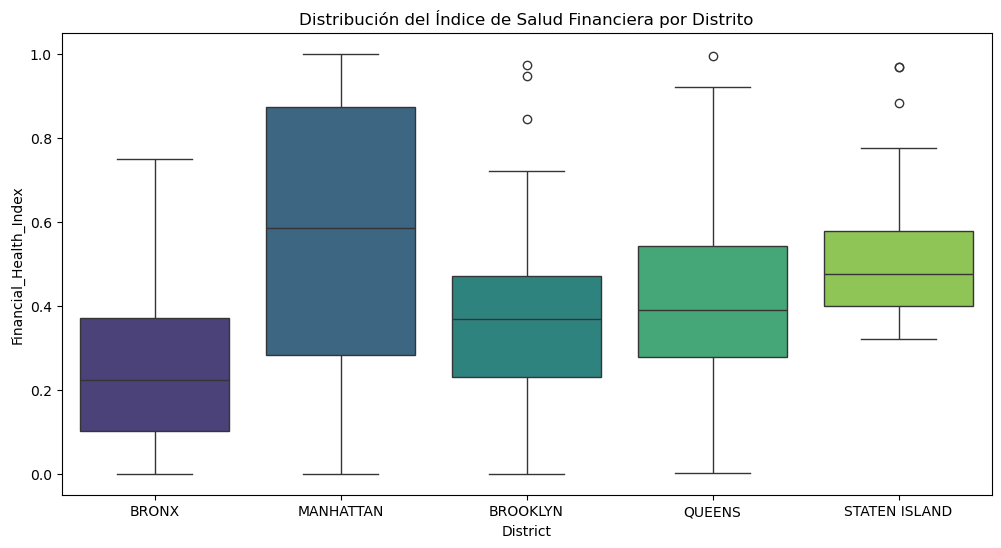

In [115]:
plt.figure(figsize=(12,6))
sns.boxplot(x='District', y='Financial_Health_Index', data=saludfinanciera_df, palette='viridis', hue='District')
plt.title('Distribución del Índice de Salud Financiera por Distrito')
plt.show()

### Explicación:
La gráfica anterior demuestra la diferencia del indice de salud financiera entre los diferentes distritos de Nueva York.
Es notable que el distrito con mayor índice de salud financiera es MANHATAN y el que menor indice tiene es BRONX.
Esto sirve para identificar que tanto conocimiento financiero tienen los distintos habitantes de Nueva York, qué tan buena es su economía dependiendo de donde viven y, en base a eso, poder realizar programas que orienten a los distritos con menos salud financiera para que mejoren su calidad de vida

# Frecuencia de tipos de delito

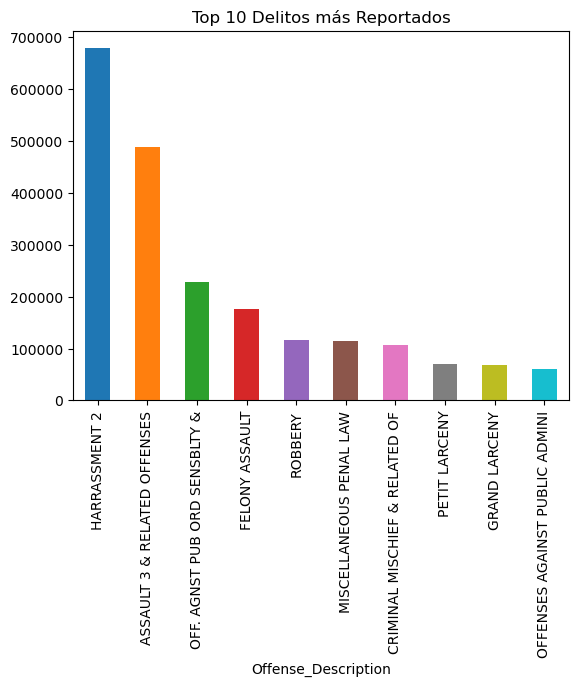

In [101]:
quejas_df['Offense_Description'].value_counts().head(10).plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Top 10 Delitos más Reportados')
plt.show()

### Explicación:
En la gráfica anterior se pueden ver los delitos más cometidos en la ciudad de Nueva York. 
Hay una clara diferencia entre los primeros dos (Acoso y Asalto) y los demás.
Esto nos sirve para comprender cuales son las amenazas más comunes en la ciudad y poder tomar medidas en para lograr una disminución en dichos delitos

# Correlación y Covarianza

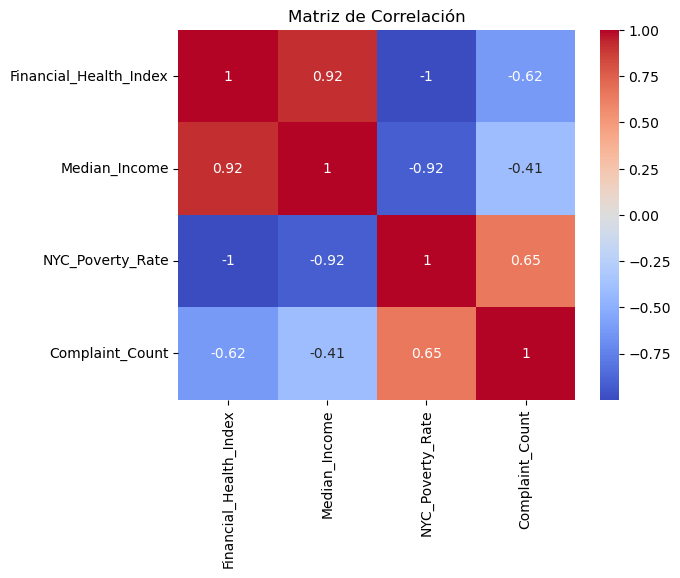

Covarianza entre Índice Financiero y Número de Delitos:
[[ 1.74334241e-02 -1.76252279e+04]
 [-1.76252279e+04  4.61886801e+10]]


In [109]:
# Agrupar datos financieros por distrito
finanzas_por_distrito = saludfinanciera_df.groupby('District').agg({
    'Financial_Health_Index': 'mean',
    'Median_Income': 'mean',
    'NYC_Poverty_Rate': 'mean'
}).reset_index()

# Contar delitos por distrito
delitos_por_distrito = quejas_df['District'].value_counts().reset_index()
delitos_por_distrito.columns = ['District', 'Complaint_Count']

# Unir datos
merged_data = pd.merge(finanzas_por_distrito, delitos_por_distrito, on='District')

# Matriz de correlación
corr_matrix = merged_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Covarianza
print("Covarianza entre Índice Financiero y Número de Delitos:")
print(np.cov(merged_data['Financial_Health_Index'], merged_data['Complaint_Count']))

### Explicación:
En el diagrama anterior se puede ver la relación que hay entre cuatro aspectos de la ciudad: El índice de salud financiera, el ingreso promedio, el índice de pobreza y la cantidad de quejas. Se muestra, por ejemplo, que hay una gran relación entre el indice de salud financiera y el ingreso promedio y que hay poca relación entre el ingreso promedio y el índice de pobreza.
Esta información nos ayuda a saber las posibles causas de los problemas socioeconómicos de la ciudad y para saber cómo solucionar dichos problemas sabiendo por dónde atacarlos. Por ejemplo, en la relación que hay entre el índice de salud financiera y el ingreso promedio se puede llegar a la conclusión de que hay que aumentar el ingreso promedio para mejorar la salud financiera general de la población.
Algunas sugerencias para aumentar el ingreso promedio de la ciudad pueden ser las siguientes:
1. Fomentar el empleo creando nuevas oportunidades laborales
2. Invertir en industrias innovadoras y energías renovables
3. Mejorar la educación
4. Invertir en el transporte público
5. Crear políticas para asegurar un salario mínimo digno
6. Fomentar el turismo y la cultura

# Distribución Geográfica de Delitos

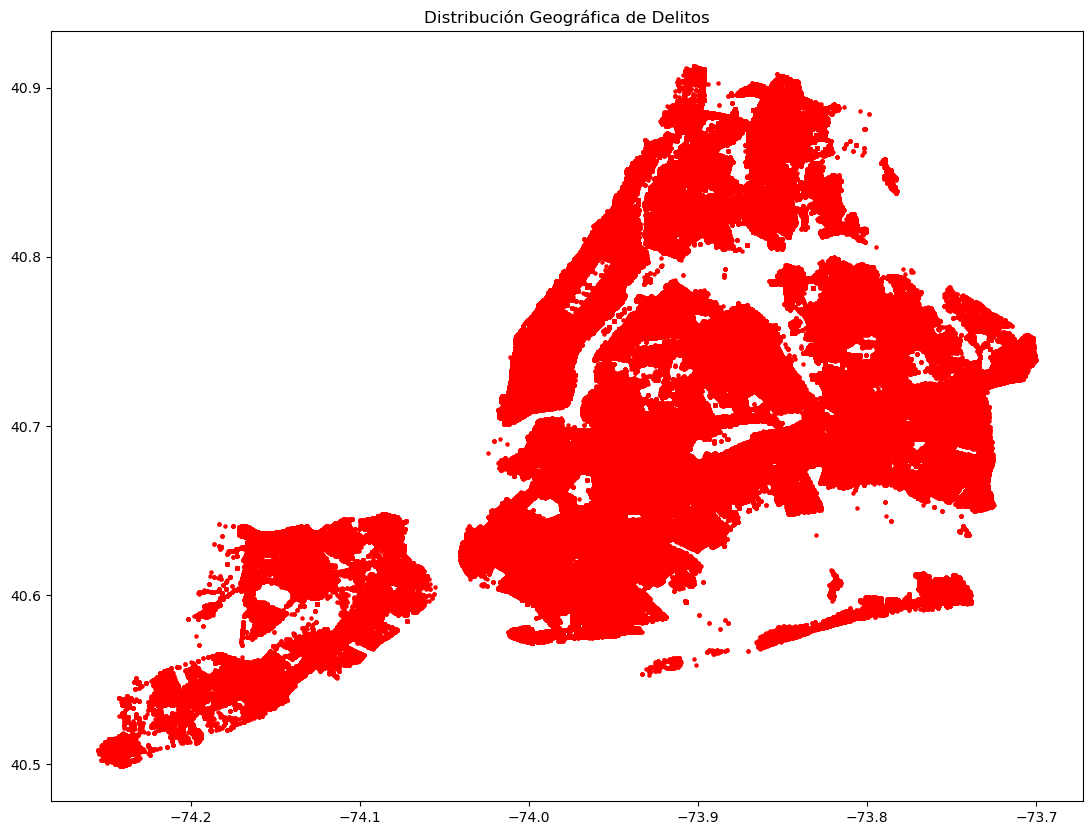

In [47]:
import geopandas as gpd
from shapely.geometry import Point

# Convertir a GeoDataFrame
geometry = [Point(xy) for xy in zip(quejas_df['Longitude'], quejas_df['Latitude'])]
geo_quejas = gpd.GeoDataFrame(quejas_df, geometry=geometry)
fig, ax = plt.subplots(figsize=(15, 10))
geo_quejas.plot(ax=ax, markersize=5, color='red', marker='o')
plt.title('Distribución Geográfica de Delitos')
plt.show()

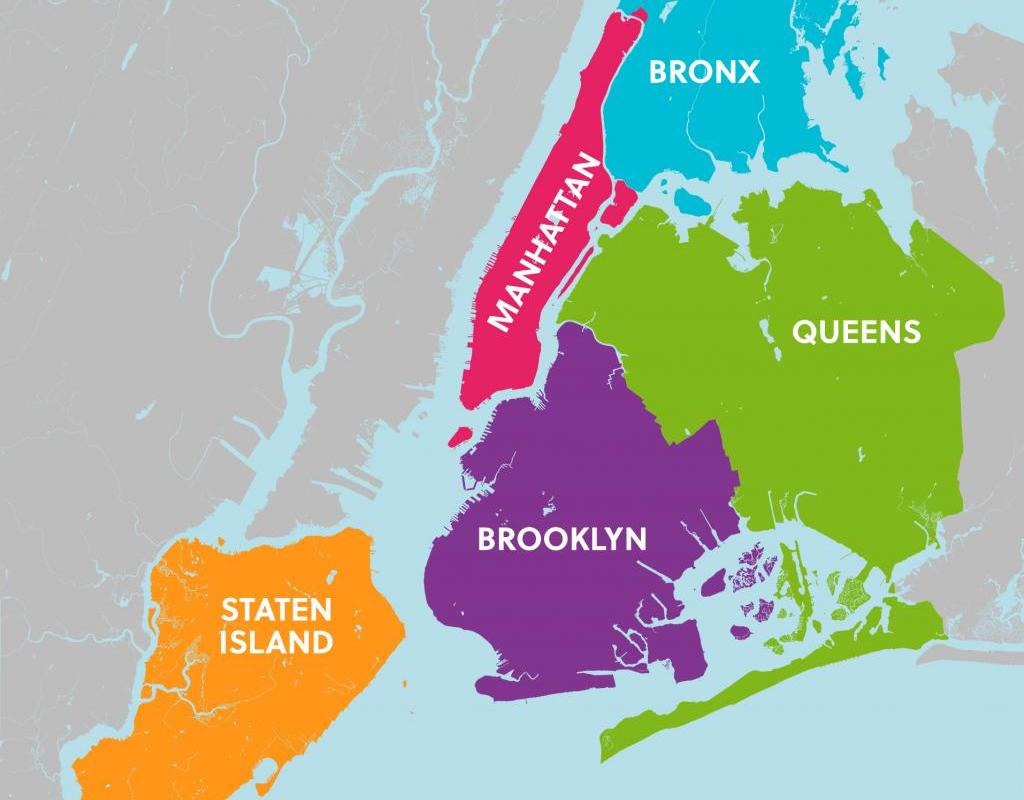

### Explicación:
La gráfica muestra un mapa de Nueva York en donde las partes rojas son los lugares en donde se cometen más delitos de cualquier tipo. Es claro que la mayor parte de la ciudad está inundada en delitos.
Las partes de la ciudad en donde menos delitos se cometen son en el noroeste de Queens y al norte de Bronx, siendo por lo tanto las zonas más seguras de la ciudad. Todo esto nos sirve para saber en qué áreas de la ciudad se tiene que reforzar los elementos de seguridad pública, por ejemplo aumentando la cantidad de policias

# Tendencia de delitos por mes/año

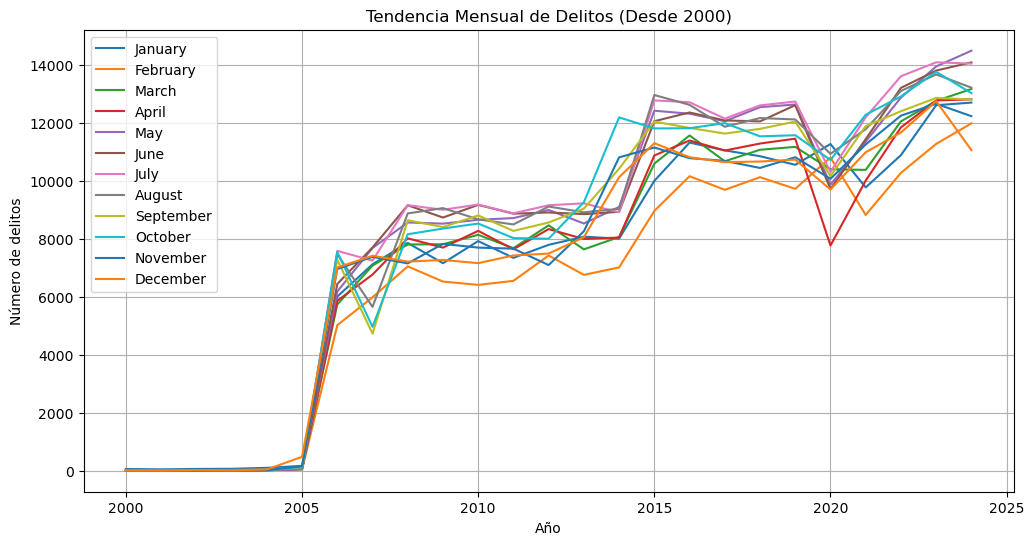

In [117]:
import calendar

# Filtrar datos desde el año 2000
quejas_df['Year'] = quejas_df['Incident_Date'].dt.year
quejas_df['Month'] = quejas_df['Incident_Date'].dt.month

# Aplicar filtro para años >= 2000
quejas_filtradas = quejas_df[quejas_df['Year'] >= 2000]

# Crear la gráfica con los datos filtrados
tendencia = quejas_filtradas.groupby(['Year', 'Month']).size().unstack()

# Renombrar las columnas de mes (números) a nombres de meses
tendencia.columns = [calendar.month_name[int(month)] for month in tendencia.columns]

tendencia.plot(figsize=(12,6))
plt.title('Tendencia Mensual de Delitos (Desde 2000)')
plt.xlabel('Año')
plt.ylabel('Número de delitos')
plt.grid(True)
plt.show()

### Explicación:
En la gráfica se pueden ver la cantidad de delitos que se cometen en cada mes de cada año desde el año 2000.
Hay varios puntos a destacar:
1. En 2005 fue cuando empezó el auge de los delitos en la ciudad de Nueva York
2. En abril de 2020 hubo una gran caída en la cantidad de delitos debido al inicio de la pandemia
3. Los meses de diciembre, enero y febrero son cuando menos delitos se cometen, muy probablemente debido al clima y la nieve.

De esta manera se pueden tomar medidas para saber en qué meses aumentar la seguridad en la ciudad mediante el aumento de la cantidad de policias, por ejemplo

# Probabilidad de que un delito sea violento dado el nivel de pobreza

/var/folders/lc/mw_sh4751wn_w5ppqd935h0r0000gn/T/ipykernel_36214/1970456033.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p_violent_poverty = merged_violence.groupby(pd.qcut(merged_violence['NYC_Poverty_Rate'], 5))['Is_Violent'].mean()


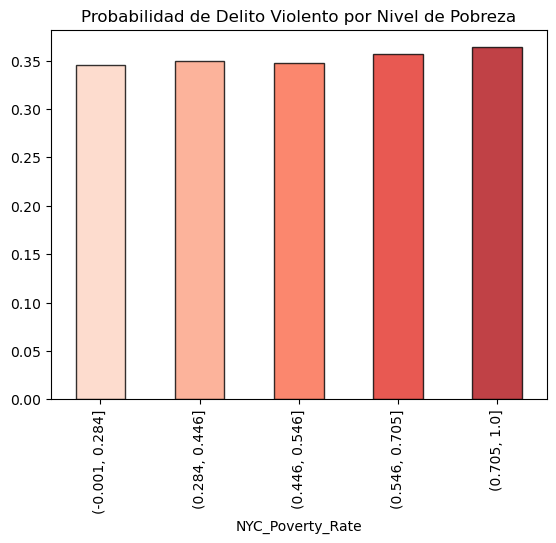

In [113]:
def is_violent(offense):
    violent_crimes = ['ASSAULT', 'ROBBERY', 'RAPE', 'HOMICIDE']
    return any(vc in offense.upper() for vc in violent_crimes)

quejas_df['Is_Violent'] = quejas_df['Offense_Description'].apply(is_violent)

# Unir con datos de pobreza
merged_violence = pd.merge(quejas_df[['District', 'Is_Violent']], saludfinanciera_df[['District', 'NYC_Poverty_Rate']], on='District')

# Probabilidad condicional
p_violent_poverty = merged_violence.groupby(pd.qcut(merged_violence['NYC_Poverty_Rate'], 5))['Is_Violent'].mean()
p_violent_poverty.plot(kind='bar', color=sns.color_palette("Reds", len(p_violent_poverty)), edgecolor='black', alpha=0.8)
plt.title('Probabilidad de Delito Violento por Nivel de Pobreza')
plt.show()

### Explicación:
En la gráfica anterior se puede ver la relación que hay entre el índice de pobreza y la probabilidad de delitos que se cometen.
Contrario a lo que se podría pensar, no hay mucha diferencia entre tener un alto y un bajo índice de pobreza con respecto a la probabilidad de que se cometa un delito violento. Es decir, sí aumenta un poco la probabilidad de que se cometa un delito violento mientras mayor sea el índice de pobreza pero el aumento de probabilidad es muy mínimo.